<a href="https://colab.research.google.com/github/Tejaswini-628/CC/blob/main/PCOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Load the dataset
df = pd.read_csv("/content/PCOS_data.csv")  # Replace with your actual filename

# 2. Drop unnecessary columns (like unnamed index or empty columns at the end)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# 3. Map binary (Y/N) columns to 1 and 0
binary_cols = [
    'Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
    'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)'
]

for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].map({'Y': 1, 'N': 0})

# 4. Map blood group to numerical values as per instructions
blood_group_map = {
    'A+': 11, 'A-': 12, 'B+': 13, 'B-': 14,
    'O+': 15, 'O-': 16, 'AB+': 17, 'AB-': 18
}

In [3]:

if 'Blood Group' in df.columns:
    df['Blood Group'] = df['Blood Group'].map(blood_group_map)

# 5. Convert numeric columns
# First, identify numeric columns manually (excluding target column and categorical ones)
non_numeric_cols = ['PCOS (Y/N)', 'Blood Group'] + binary_cols
numeric_cols = [col for col in df.columns if col not in non_numeric_cols]

# Convert to numeric
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# 6. Handle missing values: Fill missing numeric values with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# 7. Drop rows where the target value is still missing
df.dropna(subset=['PCOS (Y/N)'], inplace=True)

In [4]:
target_col = 'PCOS (Y/N)'
X = df.drop(columns=[target_col])
y = df[target_col]

# 9. Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 10. Final check
print("Final X shape:", X_scaled_df.shape)
print("Target y shape:", y.shape)
print("Sample of scaled features:\n", X_scaled_df.head())

Final X shape: (541, 43)
Target y shape: (541,)
Sample of scaled features:
      Sl. No  Patient File No.   Age (yrs)  Weight (Kg)  Height(Cm)        BMI  \
0 -1.728852         -1.728852   -0.634606    -1.364770    -0.744005 -1.236018   
1 -1.722449         -1.722449    0.845230     0.486731     0.831983  0.146227   
2 -1.716046         -1.716046    0.290291     0.831618     1.412610  0.244959   
3 -1.709643         -1.709643    1.030210     0.486731    -1.407579  1.331009   
4 -1.703240         -1.703240   -1.189545    -0.693147     0.749036 -1.038555   

   Blood Group  Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  ...  \
0          NaN          1.073680          1.633608 -0.785169  ...   
1          NaN          0.169968          0.448119  0.623440  ...   
2          NaN         -0.281888         -0.737370  0.738900  ...   
3          NaN         -0.281888          0.448119  0.969819  ...   
4          NaN         -0.281888         -0.737370 -1.339375  ...   

   Pimples(Y/N)  Fast 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [7]:
# List of binary columns to clean
binary_cols = [
    'Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
    'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
    'Fast food (Y/N)', 'Reg.Exercise(Y/N)'
]

# Step 1: Clean binary columns (replace Y/N → 1/0)
for col in binary_cols:
    df[col] = df[col].astype(str).str.strip().str.upper()
    df[col] = df[col].replace({'Y': 1, 'N': 0})

# Step 2: Clean 'Blood Group' safely
df['Blood Group'] = df['Blood Group'].astype(str).str.strip().str.upper()

# Step 3: Map valid blood groups
blood_group_map = {
    'A+': 0, 'A-': 1, 'B+': 2, 'B-': 3,
    'AB+': 4, 'AB-': 5, 'O+': 6, 'O-': 7
}
df['Blood Group'] = df['Blood Group'].map(blood_group_map)

# Step 4: Fill any remaining NaNs (numeric only)
df = df.fillna(df.median(numeric_only=True))

# Optional fallback: fill any object columns that still have NaNs with a default
df = df.fillna(0)

# ✅ Ready for scaling now!


In [8]:
from sklearn.preprocessing import StandardScaler

# Drop target column
X = df.drop(['PCOS (Y/N)'], axis=1)
y = df['PCOS (Y/N)']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Final X shape:", X_scaled_df.shape)
print("Target y shape:", y.shape)
print("Sample of scaled features:\n", X_scaled_df.head())


Final X shape: (541, 43)
Target y shape: (541,)
Sample of scaled features:
      Sl. No  Patient File No.   Age (yrs)  Weight (Kg)  Height(Cm)        BMI  \
0 -1.728852         -1.728852   -0.634606    -1.364770    -0.744005 -1.236018   
1 -1.722449         -1.722449    0.845230     0.486731     0.831983  0.146227   
2 -1.716046         -1.716046    0.290291     0.831618     1.412610  0.244959   
3 -1.709643         -1.709643    1.030210     0.486731    -1.407579  1.331009   
4 -1.703240         -1.703240   -1.189545    -0.693147     0.749036 -1.038555   

   Blood Group  Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  ...  \
0          0.0          1.073680          1.633608 -0.785169  ...   
1          0.0          0.169968          0.448119  0.623440  ...   
2          0.0         -0.281888         -0.737370  0.738900  ...   
3          0.0         -0.281888          0.448119  0.969819  ...   
4          0.0         -0.281888         -0.737370 -1.339375  ...   

   Pimples(Y/N)  Fast 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [12]:
import numpy as np

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Check for infinite values
print(np.isinf(numeric_df).sum())




Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
BP _Systolic (mmHg)       0
BP _Diastolic (mmHg)      0
Follicle No. (L)          0
Follicle No. (R)          0
Avg. F size (L) (mm)      0
Avg. F size (R) (mm)      0
Endometrium (mm)    

In [13]:
from sklearn.preprocessing import StandardScaler

# Drop target column
X = df.drop(['PCOS (Y/N)'], axis=1)
y = df['PCOS (Y/N)']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Final X shape:", X_scaled_df.shape)
print("Target y shape:", y.shape)
print("Sample of scaled features:\n", X_scaled_df.head())



Final X shape: (541, 43)
Target y shape: (541,)
Sample of scaled features:
      Sl. No  Patient File No.   Age (yrs)  Weight (Kg)  Height(Cm)        BMI  \
0 -1.728852         -1.728852   -0.634606    -1.364770    -0.744005 -1.236018   
1 -1.722449         -1.722449    0.845230     0.486731     0.831983  0.146227   
2 -1.716046         -1.716046    0.290291     0.831618     1.412610  0.244959   
3 -1.709643         -1.709643    1.030210     0.486731    -1.407579  1.331009   
4 -1.703240         -1.703240   -1.189545    -0.693147     0.749036 -1.038555   

   Blood Group  Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  ...  \
0          0.0          1.073680          1.633608 -0.785169  ...   
1          0.0          0.169968          0.448119  0.623440  ...   
2          0.0         -0.281888         -0.737370  0.738900  ...   
3          0.0         -0.281888          0.448119  0.969819  ...   
4          0.0         -0.281888         -0.737370 -1.339375  ...   

   Pimples(Y/N)  Fast 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop(['PCOS (Y/N)'], axis=1)
y = df['PCOS (Y/N)']

# Select numeric columns only to check for infinities
numeric_X = X.select_dtypes(include=[np.number])

# Replace infinite values with NaN in numeric columns
numeric_X = numeric_X.replace([np.inf, -np.inf], np.nan)

# Fill NaNs with column means
numeric_X = numeric_X.fillna(numeric_X.mean())

# If your dataset has non-numeric columns, you can either:
# 1) drop them:
# X_clean = numeric_X
# 2) or handle them separately (encoding etc) if needed

# Now scale numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_X)

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_X.columns)

print("Final X shape:", X_scaled_df.shape)
print("Target y shape:", y.shape)
print("Sample of scaled features:\n", X_scaled_df.head())


Final X shape: (541, 35)
Target y shape: (541,)
Sample of scaled features:
      Sl. No  Patient File No.   Age (yrs)  Weight (Kg)  Height(Cm)        BMI  \
0 -1.728852         -1.728852   -0.634606    -1.364770    -0.744005 -1.236018   
1 -1.722449         -1.722449    0.845230     0.486731     0.831983  0.146227   
2 -1.716046         -1.716046    0.290291     0.831618     1.412610  0.244959   
3 -1.709643         -1.709643    1.030210     0.486731    -1.407579  1.331009   
4 -1.703240         -1.703240   -1.189545    -0.693147     0.749036 -1.038555   

   Blood Group  Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  ...  \
0          0.0          1.073680          1.633608 -0.785169  ...   
1          0.0          0.169968          0.448119  0.623440  ...   
2          0.0         -0.281888         -0.737370  0.738900  ...   
3          0.0         -0.281888          0.448119  0.969819  ...   
4          0.0         -0.281888         -0.737370 -1.339375  ...   

   Vit D3 (ng/mL)  PRG

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
model = LogisticRegression()
model.fit(X_train, y_train)  # Train the model
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8165137614678899
Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        77
           1       0.69      0.69      0.69        32

    accuracy                           0.82       109
   macro avg       0.78      0.78      0.78       109
weighted avg       0.82      0.82      0.82       109



In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Store models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Train, predict, and evaluate each model
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))



=== Logistic Regression ===
Accuracy: 0.8165137614678899
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        77
           1       0.69      0.69      0.69        32

    accuracy                           0.82       109
   macro avg       0.78      0.78      0.78       109
weighted avg       0.82      0.82      0.82       109


=== Random Forest ===
Accuracy: 0.8073394495412844
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86        77
           1       0.67      0.69      0.68        32

    accuracy                           0.81       109
   macro avg       0.77      0.77      0.77       109
weighted avg       0.81      0.81      0.81       109


=== Decision Tree ===
Accuracy: 0.7431192660550459
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        77
   

In [23]:
import pandas as pd
import numpy as np

def calc_woe_iv(df, feature, target, bins=10):
    """
    Calculate Weight of Evidence (WoE) and Information Value (IV) for a feature.

    Parameters:
    - df: DataFrame containing the data
    - feature: feature column name (string)
    - target: target column name (string, binary 0/1)
    - bins: number of bins for numeric features

    Returns:
    - iv: Information Value
    - woe_df: DataFrame with WoE values per bin/category
    """
    df_temp = df[[feature, target]].copy()

    # If numeric, bin it
    if pd.api.types.is_numeric_dtype(df_temp[feature]):
        df_temp['bin'] = pd.qcut(df_temp[feature], q=bins, duplicates='drop')
    else:
        df_temp['bin'] = df_temp[feature]

    grouped = df_temp.groupby('bin', observed=True)


    # Calculate distributions
    stats = grouped[target].agg(['count', 'sum'])
    stats.columns = ['total', 'bad']
    stats['good'] = stats['total'] - stats['bad']

    # Avoid division by zero
    stats['bad_rate'] = stats['bad'] / stats['bad'].sum()
    stats['good_rate'] = stats['good'] / stats['good'].sum()

    # Replace 0 to avoid inf
    stats['bad_rate'] = stats['bad_rate'].replace(0, 0.0001)
    stats['good_rate'] = stats['good_rate'].replace(0, 0.0001)

    # Calculate WoE and IV
    stats['woe'] = np.log(stats['good_rate'] / stats['bad_rate'])
    stats['iv'] = (stats['good_rate'] - stats['bad_rate']) * stats['woe']

    iv = stats['iv'].sum()

    return iv, stats[['woe']]

# Example usage:
target_col = 'PCOS (Y/N)'
features = [col for col in df.columns if col != target_col]

iv_values = {}
for f in features:
    iv, woe = calc_woe_iv(df, f, target_col, bins=5)
    iv_values[f] = iv

# Sort features by IV descending
iv_series = pd.Series(iv_values).sort_values(ascending=False)
print("Top features by Information Value:\n", iv_series.head(10))


Top features by Information Value:
 Follicle No. (R)      2.645977
Follicle No. (L)      2.023581
Cycle length(days)    0.738764
AMH(ng/mL)            0.388061
BMI                   0.264009
Waist(inch)           0.223550
Weight (Kg)           0.217502
Hip(inch)             0.196004
PRL(ng/mL)            0.152740
 Age (yrs)            0.143560
dtype: float64


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib  # For saving the model

# Assuming df is your dataframe and these are your features and target
top_features = ['Follicle No. (R)', 'Follicle No. (L)', 'Cycle length(days)', 'AMH(ng/mL)', 'BMI']
target_column = 'PCOS (Y/N)'  # Replace with your actual target column name if different

# Select features and target
X = df[top_features]
y = df[target_column]

# Handle missing values if any (simple approach: drop)
X = X.dropna()
y = y.loc[X.index]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Save the trained model and scaler for deployment
joblib.dump(model, "random_forest_pcos_model.pkl")
joblib.dump(scaler, "scaler.pkl")


Train Accuracy: 0.9953703703703703
Test Accuracy: 0.8348623853211009
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        77
           1       0.72      0.72      0.72        32

    accuracy                           0.83       109
   macro avg       0.80      0.80      0.80       109
weighted avg       0.83      0.83      0.83       109

Confusion Matrix:
 [[68  9]
 [ 9 23]]


['scaler.pkl']

Logistic Regression:
  Train Accuracy: 0.8611
  Test Accuracy: 0.8073

Random Forest:
  Train Accuracy: 0.9954
  Test Accuracy: 0.8349

Decision Tree:
  Train Accuracy: 0.9954
  Test Accuracy: 0.7431

SVM (RBF kernel):
  Train Accuracy: 0.9028
  Test Accuracy: 0.8165

K-Nearest Neighbors:
  Train Accuracy: 0.8773
  Test Accuracy: 0.7798



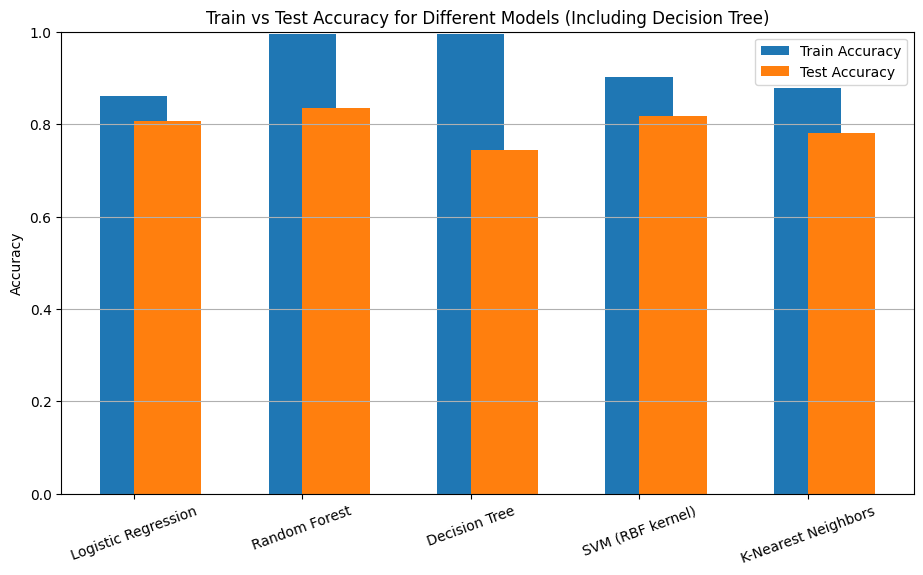

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Your 5 selected features and target column
top_features = ['Follicle No. (R)', 'Follicle No. (L)', 'Cycle length(days)', 'AMH(ng/mL)', 'BMI']
target_column = 'PCOS (Y/N)'

# Prepare data
X = df[top_features].dropna()
y = df[target_column].loc[X.index]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models to compare (including Decision Tree)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM (RBF kernel)": SVC(kernel='rbf', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

train_accuracies = []
test_accuracies = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    print(f"{name}:\n  Train Accuracy: {train_acc:.4f}\n  Test Accuracy: {test_acc:.4f}\n")

# Plotting results
x = range(len(models))
plt.figure(figsize=(11,6))
plt.bar(x, train_accuracies, width=0.4, label='Train Accuracy', align='center')
plt.bar(x, test_accuracies, width=0.4, label='Test Accuracy', align='edge')
plt.xticks(x, list(models.keys()), rotation=20)
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy for Different Models (Including Decision Tree)")
plt.legend()
plt.grid(axis='y')
plt.show()
